In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,6)

In [2]:
x = [1, 5, 4]
x.sort()
x

[1, 4, 5]

In [3]:
x = [1, 5, 4]
x.sort()
x.__class__

list

### Defining Your Own Classes

In [4]:
def earn(w,y):
    "Consumer with inital wealth w earns y"
    return w+y

def spend(w,x):
    "consumer with initial wealth w spends x"
    
    new_wealth = w -x
    
    if new_wealth < 0:
        print("Insufficient funds")
    else:
        return new_wealth

In [5]:
w0 = 100

w1 = earn(w0, 10)
w2 = spend(w1, 20)
w3 = earn(w2, 10)
w4 = spend(w3, 20)

print("w0, w1, w2, w3, w4 = ", w0, w1, w2, w3, w4)

w0, w1, w2, w3, w4 =  100 110 90 100 80


#### Example: A Consumer Class

In [6]:
class Consumer:
    
    def __init__(self, w):
        "Initialize consumer with w dollars of wealth"
    
        self.wealth = w
    
    def earn(self, y):
        "The consumer earns y dollars"
    
        self.wealth += y
    
    def spend(self, x):
        "The consumer spends x dollars if feasible"
    
        new_wealth = self.wealth - x
    
        if new_wealth < 0:
            print("Insufficent funds")
        else:
            self.wealth = new_wealth

In [7]:
c1 = Consumer(10) # Create instance with initial wealth 10
c1.spend(5)
c1.wealth

5

In [8]:
c1.earn(15)
c1.spend(100)

Insufficent funds


In [9]:
c1 = Consumer(10)
c2 = Consumer(12)
c2.spend(4)
c2.wealth

8

In [10]:
c1.wealth

10

In [11]:
c1.__dict__

{'wealth': 10}

In [12]:
c2.__dict__

{'wealth': 8}

In [13]:
print(Consumer.__dict__) # Show __dict__ attribute of class object

{'__module__': '__main__', '__init__': <function Consumer.__init__ at 0x0000019C9BE23490>, 'earn': <function Consumer.earn at 0x0000019C9BE23520>, 'spend': <function Consumer.spend at 0x0000019C9BE235B0>, '__dict__': <attribute '__dict__' of 'Consumer' objects>, '__weakref__': <attribute '__weakref__' of 'Consumer' objects>, '__doc__': None}


In [14]:
c1 = Consumer(10)
c1.earn(10)
c1.wealth

20

In [15]:
def earn(self, y):
    "The consumer earns y dollars"
    
    self.wealth += y

#### Example: The Solow Growth Model

In [16]:
class Solow:
    r"""
    Implements the Solow growth model with the update rule  
    k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)
    """
    
    def __init__(self, 
                 n = 0.05, # population growth rate
                 s = 0.25, # savings rate
                 δ = 0.1, # depreciation rate
                 α = 0.3, # share of labor
                 z = 2.0, # productivity
                 k = 1.0): # current capital stock
        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k

    def h(self):
        "Evaluate the h function"
        
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        
        # Apply the update rule
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)

    def update(self):
        "Update the current state (i.e., the capital stock)."
        
        self.k = self.h()
    
    def steady_state(self):
        "Compute the steady state value of capital."
    
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
    
        # Compute and return steady state
        return ((s * z) / (n + δ))**(1 / (1 - α))

    def generate_sequence(self, t):
        "Generate and return a time series of length t"
    
        path = []
        
        for i in range(t):
            path.append(self.k)
            self.update()
        
        return path

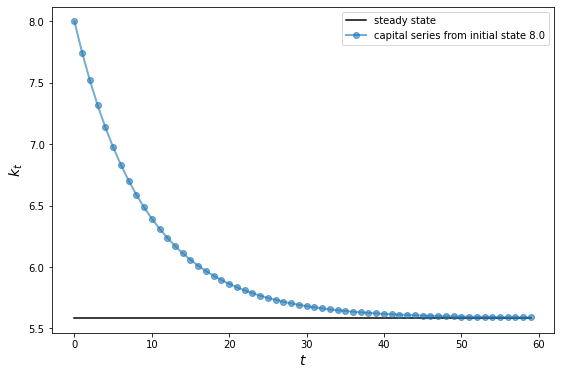

In [17]:
s1 = Solow()
s2 = Solow(k=8.0)
T = 60

fig, ax = plt.subplots(figsize=(9, 6))

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'

ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

#### Example: A Market

In [18]:
from scipy.integrate import quad

class Market:
    def __init__(self, ad, bd, az, bz, tax):
        """
        Set up market parameters. All parameters are scalars. See
        https://lectures.quantecon.org/py/python_oop.html for interpretation.
        """

        self.ad, self.bd, self.az, self.bz, self.tax = ad, bd, az, bz, tax
        if ad < az:
            raise ValueError('Insufficient demand.')
    
    
    def price(self):
        "Compute equilibrium price"
        
        return (self.ad - self.az + self.bz * self.tax) / (self.bd + self.bz)
    
    
    def quantity(self):
        "Compute equilibrium quantity"
    
        return self.ad - self.bd * self.price()
    
    
    def consumer_surp(self):
        "Compute consumer surplus"
        
        # == Compute area under inverse demand function == #
        integrand = lambda x: (self.ad / self.bd) - (1 / self.bd) * x
        area, error = quad(integrand, 0, self.quantity())
        return area - self.price() * self.quantity()


    def producer_surp(self):
        "Compute producer surplus"

        # == Compute area above inverse supply curve, excluding tax == #
        integrand = lambda x: -(self.az / self.bz) + (1 / self.bz) * x
        area, error = quad(integrand, 0, self.quantity())
        return (self.price() - self.tax) * self.quantity() - area
    
    
    def taxrev(self):
        "Compute tax revenue"
    
        return self.tax * self.quantity()
    
    
    def inverse_demand(self, x):
        "Compute inverse demand"
    
        return self.ad / self.bd - (1 / self.bd)* x
    
    
    def inverse_supply(self, x):
        "Compute inverse supply curve"
    
        return -(self.az / self.bz) + (1 / self.bz) * x + self.tax
    
    def inverse_supply_no_tax(self, x):
        "Compute inverse supply curve without tax"
    
        return -(self.az / self.bz) + (1 / self.bz) * x

In [19]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
print("equilibrium price = ", m.price())

equilibrium price =  18.5


In [20]:
print("consumer surplus = ", m.consumer_surp())

consumer surplus =  33.0625


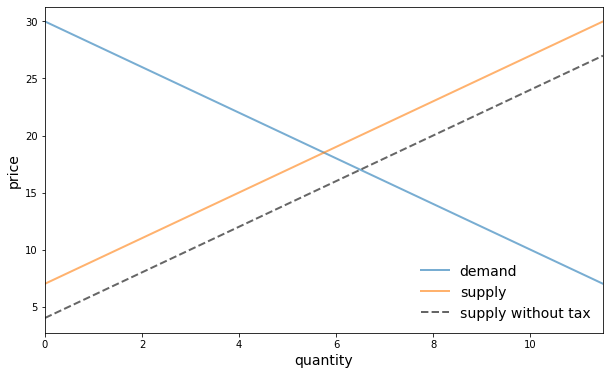

In [21]:
# Baseline ad, bd, az, bz, tax
baseline_params = 15, .5, -2, .5, 3

m = Market(*baseline_params)
q_max = m.quantity() * 2
q_grid = np.linspace(0.0, q_max, 100)
pd = m.inverse_demand(q_grid)
ps = m.inverse_supply(q_grid)
psno = m.inverse_supply_no_tax(q_grid)
fig, ax = plt.subplots()

ax.plot(q_grid, pd, lw=2, alpha=0.6, label='demand')
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='supply')
ax.plot(q_grid, psno, '--k', lw=2, alpha=0.6, label='supply without tax')

ax.set_xlabel('quantity', fontsize=14)
ax.set_xlim(0, q_max)
ax.set_ylabel('price', fontsize=14)
ax.legend(loc='lower right', frameon=False, fontsize=14)

plt.show()

In [22]:
def deadw(m):
    "Computes deadweight loss for market m."
    
    # == Create analogous market with no tax == #
    m_no_tax = Market(m.ad, m.bd, m.az, m.bz, 0)
    # == Compare surplus, return difference == #
    surp1 = m_no_tax.consumer_surp() + m_no_tax.producer_surp()
    surp2 = m.consumer_surp() + m.producer_surp() + m.taxrev()
    
    return surp1 - surp2

In [23]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
deadw(m) # Show deadweight loss

1.125

### Example: Chaos

In [24]:
class Chaos:
    """
    Models the dynamical system :math:`x_{t+1} = r x_t (1 - x_t)`
    """

    def __init__(self, x0, r):
        """
        Initialize with state x0 and parameter r
        """

        self.x, self.r = x0, r


    def update(self):
        "Apply the map to update state."

        self.x = self.r * self.x *(1 - self.x)


    def generate_sequence(self, n):
        "Generate and return a sequence of length n."

        path = []
        for i in range(n):
            path.append(self.x)
            self.update()
        
        return path

In [25]:
ch = Chaos(0.1, 4.0) # x0 = 0.1 and r = 0.4
ch.generate_sequence(5) # First 5 iterates

[0.1, 0.36000000000000004, 0.9216, 0.28901376000000006, 0.8219392261226498]

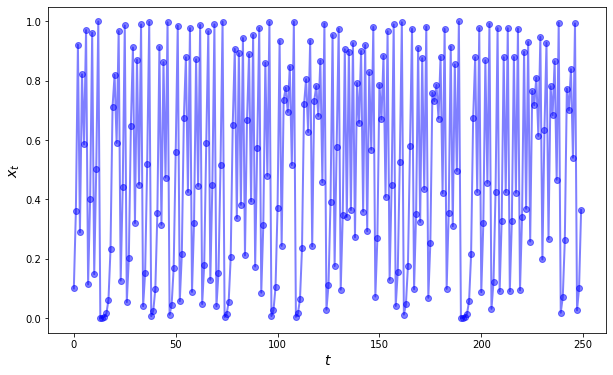

In [26]:
ch = Chaos(0.1, 4.0)
ts_length = 250
fig, ax = plt.subplots()
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$x_t$', fontsize=14)
x = ch.generate_sequence(ts_length)
ax.plot(range(ts_length), x, 'bo-', 
        alpha=0.5, lw=2, label='$x_t$')

plt.show()

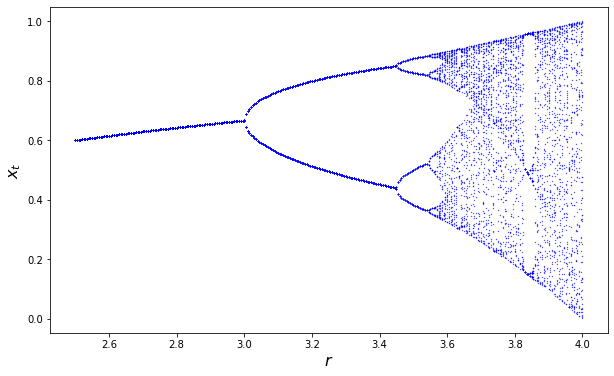

In [27]:
fig, ax = plt.subplots()
ch = Chaos(0.1, 4)
r = 2.5

while r < 4:
    ch.r = r
    t = ch.generate_sequence(1000)[950:]
    ax.plot([r] * len(t), t, 'b.', ms=0.6)
    r = r + 0.005

ax.set_xlabel('$r$', fontsize=16)
ax.set_ylabel('$x_t$', fontsize=16)

plt.show()

### Special Methods

In [28]:
x = (10, 20)
len(x)

2

In [29]:
class Foo:
    def __len__(self):
        
        return 42

In [30]:
f = Foo()
len(f)

42

In [31]:
class Foo:
    def __call__(self, x):
        
        return x + 42

In [32]:
f = Foo()
f(8) # Exactly equivalent to f.__call__(8)

50

### Exercises

In [37]:
from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)
F(0.5) # Evaluate ecdf at x = 0.5

0.8

In [38]:
F.observations = [uniform(0, 1) for i in range(1000)]
F(0.5)

0.503

In [35]:
class ECDF:
    def __init__(self, observations):
        self.observations = observations
    
    
    def __call__(self, x):
        counter = 0.0
        for obs in self.observations:
            if obs <= x:
                counter += 1
        
        return counter / len(self.observations)

In [36]:
# == test == #
from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)

In [39]:
print(F(0.5)) # Evaluate ecdf at x = 0.5
F.observations = [uniform(0, 1) for i in range(1000)]
print(F(0.5))

0.503
0.472


In [40]:
class Polynomial:
    def __init__(self, coefficients):
        """
        Creates an instance of the Polynomial class representing
        p(x) = a_0 x^0 + ... + a_N x^N,
        where a_i = coefficients[i].
        """

        self.coefficients = coefficients


    def __call__(self, x):
        "Evaluate the polynomial at x."
    
        y = 0
        for i, a in enumerate(self.coefficients):
            y += a * x**i
    
        return y


    def differentiate(self):
        "Reset self.coefficients to those of p' instead of p."
        new_coefficients = []
        for i, a in enumerate(self.coefficients):
            new_coefficients.append(i * a)
        
        # Remove the first element, which is zero
        del new_coefficients[0]
        
        # And reset coefficients data to new values
        self.coefficients = new_coefficients
        
        return new_coefficients

### End.